In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [10]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

NO NULL VALUES !!

In [12]:
df.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Heavily Imbalanced Class!

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

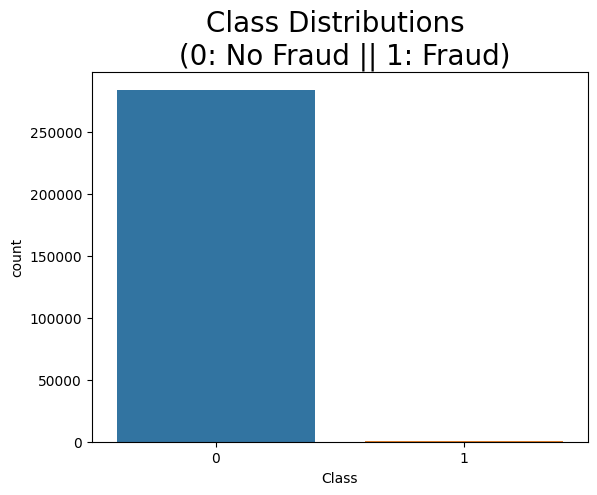

In [13]:
sns.countplot(x = 'Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=20)

(0.0, 172792.0)

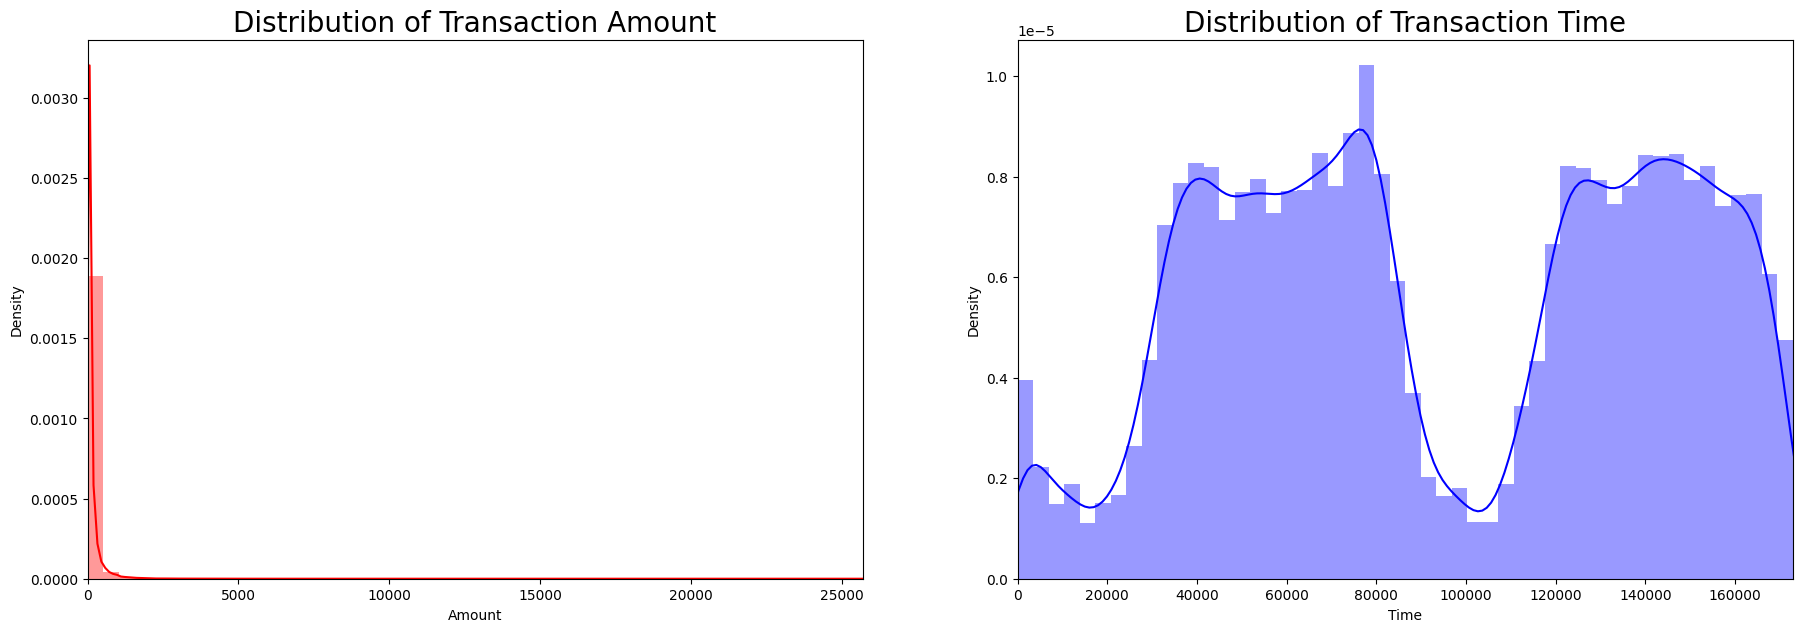

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(22,7))
sns.distplot(df.Amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=20)
ax[0].set_xlim([min(df.Amount), max(df.Amount)])

sns.distplot(df.Time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=20)
ax[1].set_xlim([min(df.Time), max(df.Time)])

In [15]:
df.Amount = StandardScaler().fit_transform(df.Amount.values.reshape(-1,1))
df.Time = StandardScaler().fit_transform(df.Time.values.reshape(-1,1))

In [16]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
X = df.drop('Class', axis=1)
y = df['Class']
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [17]:
print(df.Class.value_counts(normalize=True))
print(original_ytrain.value_counts(normalize=True))
print(original_ytest.value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [18]:
model = LogisticRegression(random_state=123, 
                              max_iter = 1000)


model.fit(original_Xtrain, original_ytrain)
preds = model.predict(original_Xtest)

In [19]:
accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 1.00
Precision is: 0.94
Recall is: 0.48
Fscore is: 0.49
AUC is: 0.74


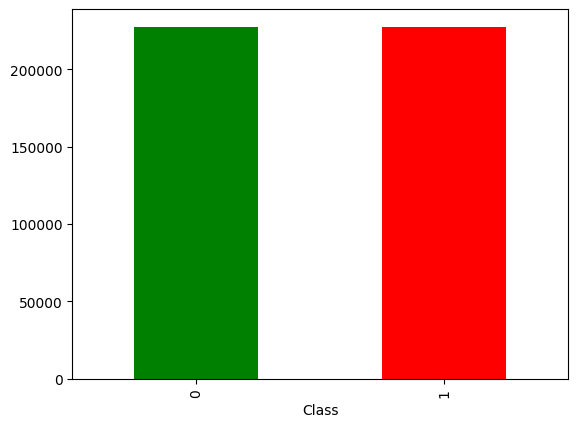

In [20]:
smote_sampler = SMOTE(random_state = 123)
X_smo, y_smo = smote_sampler.fit_resample(original_Xtrain, original_ytrain)
y_smo.value_counts().plot.bar(color=['green', 'red'])
model.fit(X_smo, y_smo)
preds = model.predict(original_Xtest)

In [21]:
accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.99
Precision is: 0.12
Recall is: 0.87
Fscore is: 0.70
AUC is: 0.93


In [22]:
scores = pd.DataFrame(columns = ['Model','Accuracy','Precision','Recall','Fscore','AUC'])
scores = scores._append({'Model': ['LogisticRegression(BeforeClassWeight)'] ,'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'Fscore':[fbeta],'AUC':[auc] } , ignore_index = True)

In [23]:
class_weight = {}

# Assign weight of class 0 to be 0.1
class_weight[0] = 0.1

# Assign weight of class 1 to be 0.9
class_weight[1] = 0.9
model = LogisticRegression(random_state=123, 
                              max_iter = 1000,
                              class_weight=class_weight)
model.fit(original_Xtrain, original_ytrain)
preds = model.predict(original_Xtest)

In [24]:
accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")
scores = scores._append({'Model': ['LogisticRegression'] ,'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'Fscore':[fbeta],'AUC':[auc] } , ignore_index = True)

Accuracy is: 1.00
Precision is: 0.81
Recall is: 0.73
Fscore is: 0.74
AUC is: 0.87


In [25]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn = knn.fit(original_Xtrain, original_ytrain)
preds = knn.predict(original_Xtest)
accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}") 
scores = scores._append({'Model': ['KNNeighbours'] ,'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'Fscore':[fbeta],'AUC':[auc] }, ignore_index = True)

Accuracy is: 1.00
Precision is: 0.91
Recall is: 0.72
Fscore is: 0.73
AUC is: 0.86


In [26]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
model = DecisionTreeClassifier(random_state=123)
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 3, verbose = 1)
grid_search.fit(original_Xtrain, original_ytrain.values.ravel())
preds = grid_search.predict(original_Xtest)

accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")
scores = scores._append({'Model': ['DecisionTreeClassifier'] ,'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'Fscore':[fbeta],'AUC':[auc] }, ignore_index = True)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Accuracy is: 1.00
Precision is: 0.92
Recall is: 0.67
Fscore is: 0.68
AUC is: 0.84


In [27]:

from sklearn.ensemble import BaggingClassifier
n_estimators=20
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2),n_estimators=n_estimators,random_state=0,bootstrap=True)
Bag.fit(original_Xtrain, original_ytrain)
preds = Bag.predict(original_Xtest)

accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")
scores = scores._append({'Model': ['BaggingClassifier'] ,'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'Fscore':[fbeta],'AUC':[auc] }, ignore_index = True)

Accuracy is: 1.00
Precision is: 0.88
Recall is: 0.70
Fscore is: 0.71
AUC is: 0.85


In [28]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='roc_auc',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(original_Xtrain, original_ytrain)
preds = GV_ABC.predict(original_Xtest)
accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")
scores = scores._append({'Model': ['AdaBoostClassifier'] ,'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'Fscore':[fbeta],'AUC':[auc] }, ignore_index = True)

Accuracy is: 1.00
Precision is: 0.96
Recall is: 0.28
Fscore is: 0.28
AUC is: 0.64


In [29]:
estimators = []
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))

XGB = XGBClassifier(random_state=13)

In [30]:
from sklearn.ensemble import StackingClassifier
SC = StackingClassifier(estimators=estimators,final_estimator=XGB)
SC.fit(original_Xtrain, original_ytrain)
preds = SC.predict(original_Xtest)
accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")
scores = scores._append({'Model': ['StackingClassifier'] ,'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'Fscore':[fbeta],'AUC':[auc] }, ignore_index = True)

Accuracy is: 1.00
Precision is: 0.69
Recall is: 0.18
Fscore is: 0.19
AUC is: 0.59


In [31]:
scores

,Model,Accuracy,Precision,Recall,Fscore,AUC
0,[LogisticRegression(BeforeClassWeight)],[0.9885535717420691],[0.11740331491712708],[0.8673469387755102],[0.6962822936357907],[0.9280547014718871]
1,[LogisticRegression],[0.9992450975228665],[0.8089887640449438],[0.7346938775510204],[0.7372981488775109],[0.8671974566869817]
2,[KNNeighbours],[0.9994031003669177],[0.9102564102564102],[0.7244897959183674],[0.7302215189873419],[0.8621833465109661]
3,[DecisionTreeClassifier],[0.9993328768806727],[0.9166666666666666],[0.673469387755102],[0.6804123711340206],[0.8366819354933646]
4,[BaggingClassifier],[0.9993328768806727],[0.8846153846153846],[0.7040816326530612],[0.7096518987341772],[0.8519616787502509]
5,[AdaBoostClassifier],[0.9987359772475904],[0.9642857142857143],[0.2755102040816326],[0.2832929782082324],[0.6377463089767853]
6,[StackingClassifier],[0.9984550833026106],[0.6923076923076923],[0.1836734693877551],[0.1890145395799677],[0.5917663901816288]
